In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [9]:
df = pd.read_csv("bank-additional-full.csv", sep = ';') ; df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Check Info and describe

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [11]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
df.shape

(41188, 21)

Define some functions

In [13]:
def unique_val(data):
    cols = data.columns
    for i in cols:
        if data[i].dtype == 'O':
            print('Unique values in',i,'are',data[i].unique())
            print('----------------------------------------------')
        elif (data[i].dtype !='O') & (data[i].nunique() < 2):
            print(i,'is a dormant column')
            print('----------------------------------------------')
            
def barplot(cols):  
    for col in cols:
        df.groupby(['y'])[col].mean().plot(kind = 'bar')
        plt.ylabel(col)
        plt.title(f'how the \'{col}\' variable relates with the target')
        plt.show();

def scatter(x1, x2, data = df):
    plt.figure(figsize = (10,6))
    plt.scatter(x1, x2, data = data)
    plt.xlabel(x1)
    plt.ylabel(x2)
    plt.title(f'scatter plot of {x1} and {x2}')
    plt.show();
    
def categorical(series):
    for col in df[series].unique():    
        print(f'distribution of {col}')
        print(df[df[series] == col]['y'].value_counts(normalize = True))
        print('---------------')
    print('----Plot------')
    sns.countplot('y', hue = series , data = df);
    plt.title(f'plot of {series} and the target')
    plt.show()

Check the unique values in each categorical column

In [14]:
unique_val(df)

Unique values in job are ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
----------------------------------------------
Unique values in marital are ['married' 'single' 'divorced' 'unknown']
----------------------------------------------
Unique values in education are ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
----------------------------------------------
Unique values in default are ['no' 'unknown' 'yes']
----------------------------------------------
Unique values in housing are ['no' 'yes' 'unknown']
----------------------------------------------
Unique values in loan are ['no' 'yes' 'unknown']
----------------------------------------------
Unique values in contact are ['telephone' 'cellular']
----------------------------------------------
Unique values in month are ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'm

plot boxplot for each numeric column

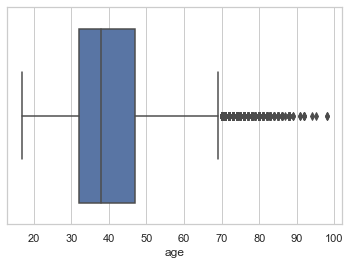

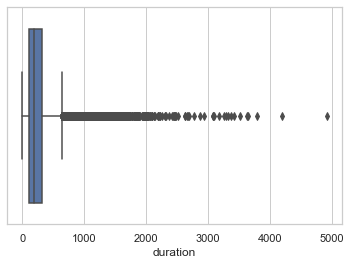

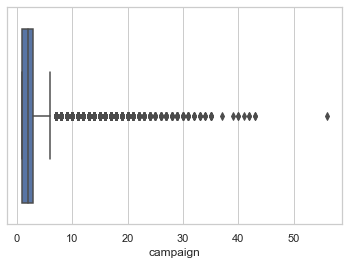

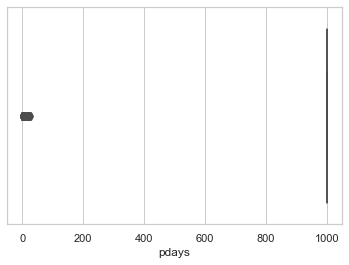

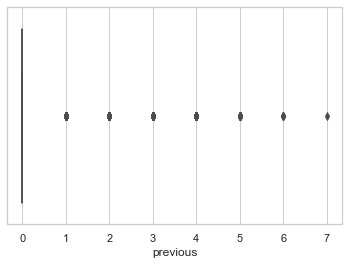

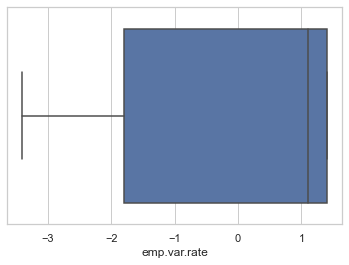

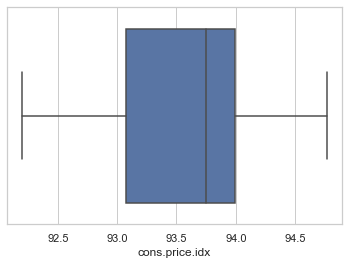

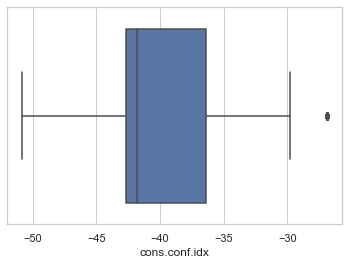

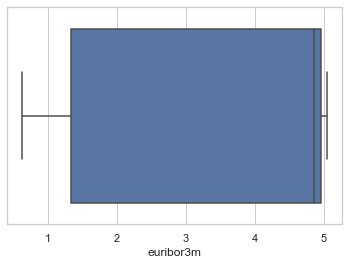

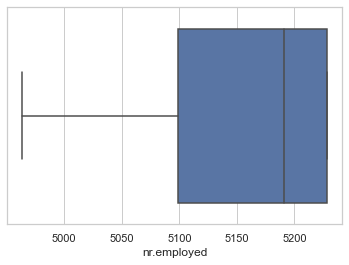

In [15]:
num_cols = df._get_numeric_data()
for col in num_cols:
    ax = sns.boxplot(df[col])
    plt.savefig(f"{col}.png")
    plt.show()

In [16]:
df.y.unique()

array(['no', 'yes'], dtype=object)

In [17]:
d = {'yes':1, 'no':0}
df.y = df.y.replace(d)

compute correlation

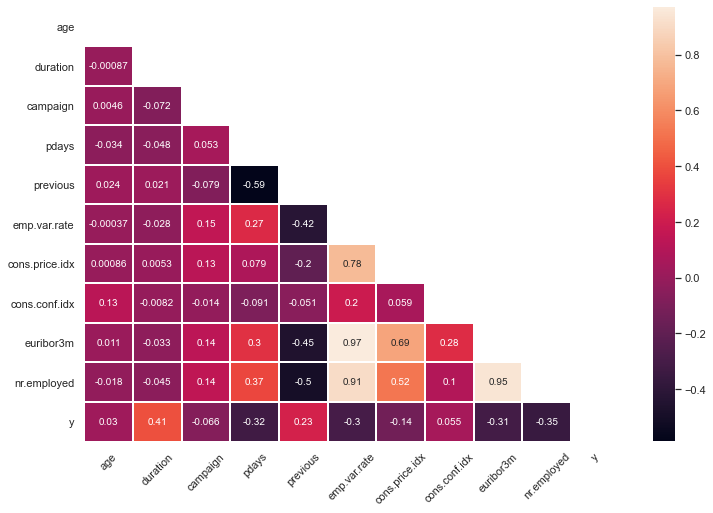

In [18]:
sns.set_style('whitegrid')
corr_matrix = df.corr()

#mask the correlation matrix to display only lower triangle matrix
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

#plot the correlation
plt.figure(figsize = (12,8))
sns.heatmap(corr_matrix, mask = mask, annot = True, linewidth = 1)
plt.xticks(rotation = 45);

these columns 'duration', 'pdays', 'previous', 'emp.var.rate', 'euribor3m', 'nr.employed' have a high correlation with the target variable and/or within themselves. Let's try to understand y

In [19]:
cols = ['duration', 'pdays', 'previous', 'emp.var.rate', 'euribor3m', 'nr.employed']

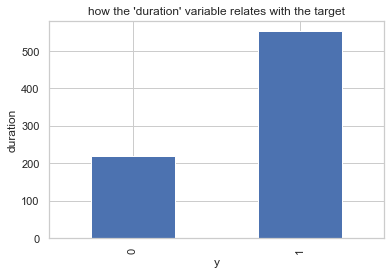

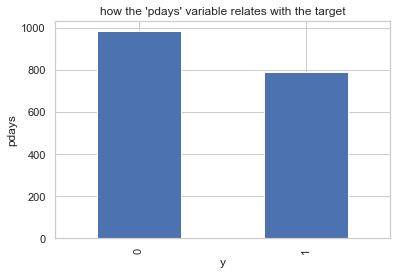

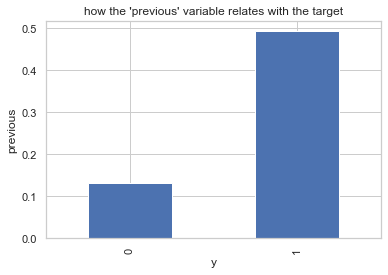

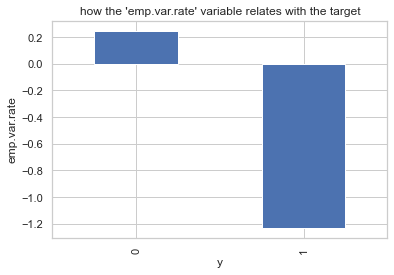

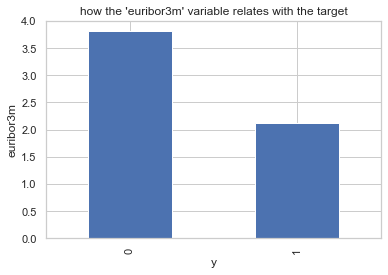

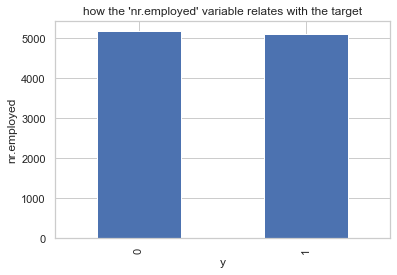

In [20]:
barplot(cols)

> For the duration and previous column, we realized from the barplot that clients that subscribe have notable higher duration that customers that didn't subscribe. The opposite is the case for the euribor3m column. It can be noticed in the emp.var.rate column that clients that subscribed have emp.var.rate equal to or less than zero, while clients that did not subscribe have positive emp.var.rate.

In [89]:
df[df['emp.var.rate'] < 0]['y'].value_counts(normalize = True)

0    0.794427
1    0.205573
Name: y, dtype: float64

In [23]:
df.y.value_counts(normalize = True)

0    0.887346
1    0.112654
Name: y, dtype: float64

The ratio of customers that subscribed with negative emp.var.rate is 2X more than the ratio of total ratio of the customers that subscribed. This means a higher ratio of customers that subscribe fall in this group than the ratio of customers that didn't. This is also evident in the previous volumn

In [24]:
df[df['previous'] == 1]['y'].value_counts(normalize = True)

0    0.787985
1    0.212015
Name: y, dtype: float64

In [25]:
df[df['duration'] == 0]['y'].value_counts(normalize = True)

0    1.0
Name: y, dtype: float64

In [26]:
df[df.y == 1]['duration'].mean()

553.1911637931034

In [27]:
df[df.duration > 553 ]['y'].value_counts(normalize =  True)

0    0.538405
1    0.461595
Name: y, dtype: float64

comment here

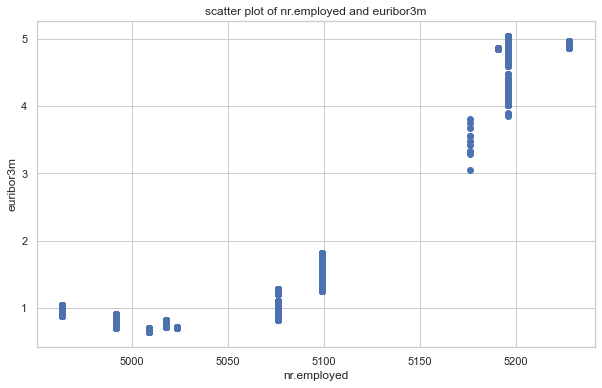

In [28]:
scatter('nr.employed', 'euribor3m')

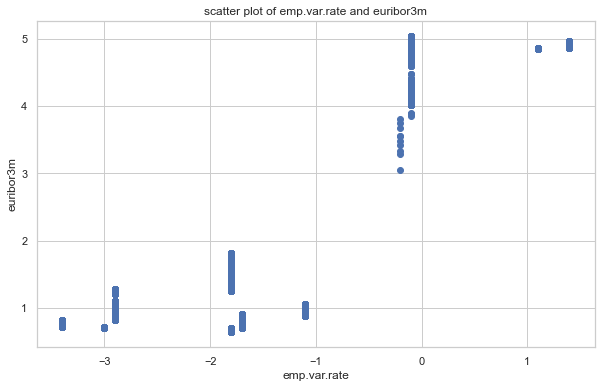

In [29]:
scatter('emp.var.rate', 'euribor3m')

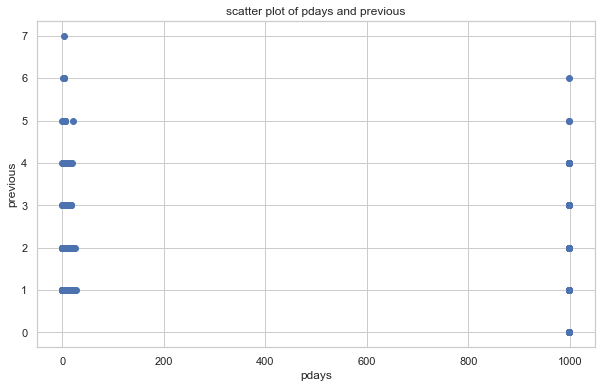

In [30]:
scatter('pdays', 'previous')

In [31]:
df[df.previous == 0]['pdays'].value_counts()

999    35563
Name: pdays, dtype: int64

comment

In [32]:
pd.crosstab(df['nr.employed'],df['emp.var.rate'] )

emp.var.rate,-3.4,-3.0,-2.9,-1.8,-1.7,-1.1,-0.2,-0.1,1.1,1.4
nr.employed,,,,,,,,,,
4963.6,0,0,0,0,0,635,0,0,0,0
4991.6,0,0,0,0,773,0,0,0,0,0
5008.7,0,0,0,650,0,0,0,0,0,0
5017.5,1071,0,0,0,0,0,0,0,0,0
5023.5,0,172,0,0,0,0,0,0,0,0
5076.2,0,0,1663,0,0,0,0,0,0,0
5099.1,0,0,0,8534,0,0,0,0,0,0
5176.3,0,0,0,0,0,0,10,0,0,0
5191.0,0,0,0,0,0,0,0,0,7763,0


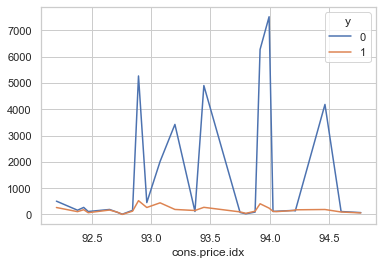

In [33]:
pd.crosstab(df['cons.price.idx'], df['y']).plot()

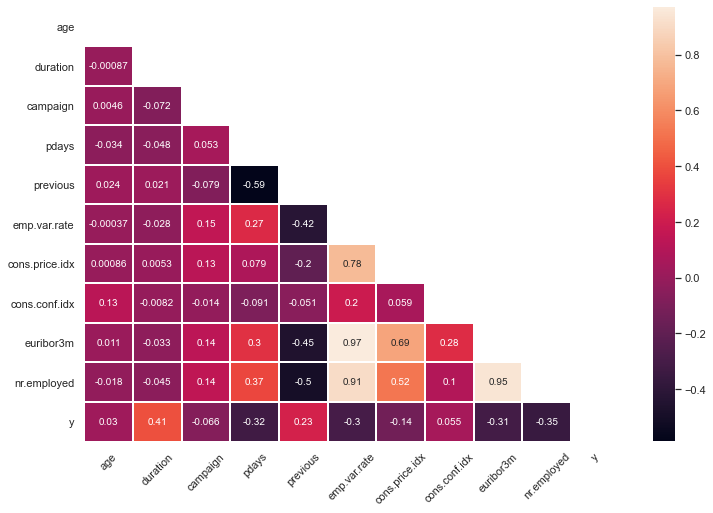

In [34]:
sns.set_style('whitegrid')
corr_matrix = df.corr()

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
plt.figure(figsize = (12,8))
sns.heatmap(corr_matrix, mask = mask, annot = True, linewidth = 1)
plt.xticks(rotation = 45);

distribution of basic.4y
0    0.89751
1    0.10249
Name: y, dtype: float64
---------------
distribution of high.school
0    0.891645
1    0.108355
Name: y, dtype: float64
---------------
distribution of basic.6y
0    0.917976
1    0.082024
Name: y, dtype: float64
---------------
distribution of basic.9y
0    0.921754
1    0.078246
Name: y, dtype: float64
---------------
distribution of professional.course
0    0.886515
1    0.113485
Name: y, dtype: float64
---------------
distribution of unknown
0    0.854997
1    0.145003
Name: y, dtype: float64
---------------
distribution of university.degree
0    0.862755
1    0.137245
Name: y, dtype: float64
---------------
distribution of illiterate
0    0.777778
1    0.222222
Name: y, dtype: float64
---------------
----Plot------


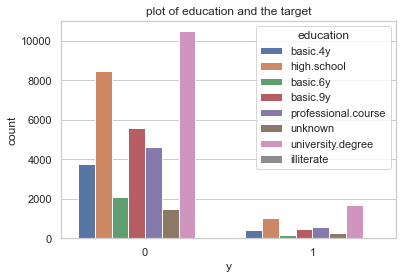

In [35]:
categorical('education')

distribution of telephone
0    0.947687
1    0.052313
Name: y, dtype: float64
---------------
distribution of cellular
0    0.852624
1    0.147376
Name: y, dtype: float64
---------------
----Plot------


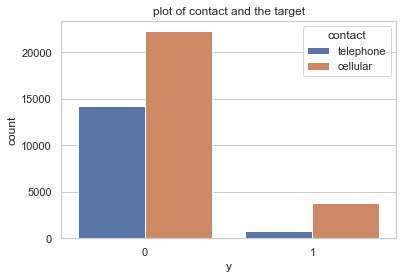

In [36]:
categorical('contact')

distribution of no
0    0.87121
1    0.12879
Name: y, dtype: float64
---------------
distribution of unknown
0    0.94847
1    0.05153
Name: y, dtype: float64
---------------
distribution of yes
0    1.0
Name: y, dtype: float64
---------------
----Plot------


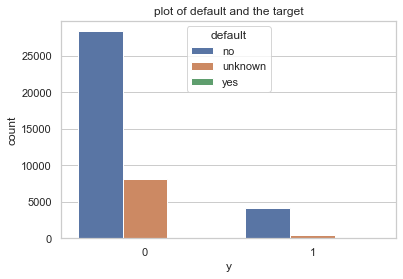

In [37]:
categorical('default')

distribution of no
0    0.886598
1    0.113402
Name: y, dtype: float64
---------------
distribution of yes
0    0.890685
1    0.109315
Name: y, dtype: float64
---------------
distribution of unknown
0    0.891919
1    0.108081
Name: y, dtype: float64
---------------
----Plot------


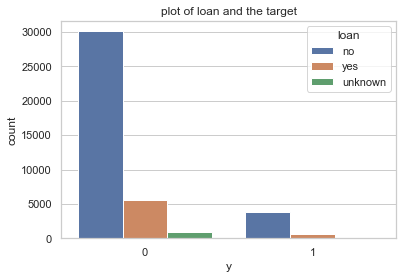

In [38]:
categorical('loan')

Creating a baseline model

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [41]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [42]:
df['new_pdays'] = df.pdays.apply(lambda x: 1 if x < 16 else 0 if x > 30 else 2)
df['new_pdays'] = df.previous * df.new_pdays
df['new_emp_rate'] = df['emp.var.rate'].apply(lambda x: 0 if x > 0 else 1)
df['empxemp'] = (df['nr.employed'] / df['euribor3m'])# + df['emp.var.rate']

In [72]:
y = df.y
X = pd.get_dummies(df.drop(['y','cons.conf.idx','previous'], axis = 1))

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state =2)

In [77]:
def rf_model(X_train, y_train, n_estimators = 100): 
    rf =RandomForestClassifier(random_state=1, n_estimators=n_estimators)
    rf.fit(X_train, y_train)
    return rf.feature_importances_, rf
    
def score(X_train, X_test, y_train, y_test, model):
    train_score, test_score = f1_score(y_train, model.predict(X_train)), f1_score(y_test, model.predict(X_test))
    print('train_score is {:.3f}, test_score is {:.3f}'.format(train_score, test_score))

In [50]:
feature_imp, rf = rf_model(X_train, y_train)

In [51]:
score(X_train, X_test, y_train, y_test,rf)

train_score is 1.000, test_score is 0.575


In [52]:
imp = pd.DataFrame(feature_imp, index = X.columns, columns = ['coef']).sort_values(by = 'coef', ascending = False)

In [53]:
imp.T

,duration,empxemp,age,euribor3m,nr.employed,campaign,new_pdays,cons.price.idx,poutcome_success,pdays,...,month_jul,month_aug,housing_unknown,loan_unknown,month_sep,job_unknown,month_dec,marital_unknown,education_illiterate,default_yes
coef,0.282637,0.07766,0.074534,0.065977,0.054911,0.037266,0.020595,0.020474,0.019358,0.016698,...,0.002517,0.002495,0.001913,0.001724,0.001699,0.001653,0.000751,0.000455,0.000302,1.926763e-10


Text(0, 0.5, '‘cumulative explained variance’')

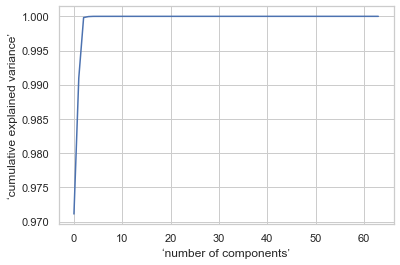

In [38]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('‘number of components’')
plt.ylabel('‘cumulative explained variance’')

with PCA

In [81]:
pca = PCA(10)
x_train_pca = pca.fit_transform(X_train)
x_test_pca = pca.transform(X_test)

In [82]:
importances, rf_pca = rf_model(x_train_pca, y_train, 200)

In [83]:
score(x_train_pca, x_test_pca, y_train, y_test, rf_pca)

train_score is 1.000, test_score is 0.585


with minority class oversampling

In [64]:
from imblearn.over_sampling import SMOTE

In [84]:
sm = SMOTE(k_neighbors=5, random_state= 5)

In [85]:
X_m, y_m = sm.fit_sample(x_train_pca, y_train)

In [86]:
importances, rf_sm = rf_model(X_m, y_m, 200)

In [88]:
score(X_m, x_test_pca, y_m, y_test, rf_sm)

train_score is 1.000, test_score is 0.629
